In [1]:
import os
import numpy as np
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


<ipython-input-1-414408b93e2c>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
import os
os.environ['KAGGLE USERNAME']="nadiasharaz"
os.environ['KAGGLE KEY']="500d9ab35f406405fd207c19240587b7"

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 99% 656M/663M [00:05<00:00, 225MB/s]
100% 663M/663M [00:05<00:00, 125MB/s]


In [6]:
!unzip tuberculosis-tb-chest-xray-dataset.zip

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [7]:
!pip install mplcyberpunk # matplotlib plots a futuristic and visually distinctive appearance.
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [8]:
base_path = r'/content/TB_Chest_Radiography_Database'
base_path = pathlib.Path(base_path)
base_path

PosixPath('/content/TB_Chest_Radiography_Database')

In [29]:
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 4200 files [00:10, 397.19 files/s]


In [30]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D


In [31]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('X_ray_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('X_ray_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('X_ray_Imgs/val/', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 2939 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 1049 images belonging to 2 classes.


In [32]:
class_name=train_data.class_indices

class_names=list(class_name.keys())
class_name

{'Normal': 0, 'Tuberculosis': 1}

In [33]:
num_classes=2
model = Sequential()
model.add(ResNet50(input_shape=(200,200,3),include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1
                  )

Epoch 1/10
146/146 [==============================] - 444s 3s/step - loss: 0.1431 - accuracy: 0.9469 - val_loss: 1.0556 - val_accuracy: 0.8413
Epoch 2/10
146/146 [==============================] - 443s 3s/step - loss: 0.0864 - accuracy: 0.9750 - val_loss: 1.9534 - val_accuracy: 0.8413
Epoch 3/10
146/146 [==============================] - 434s 3s/step - loss: 0.0643 - accuracy: 0.9815 - val_loss: 1.8409 - val_accuracy: 0.8433
Epoch 4/10
146/146 [==============================] - 436s 3s/step - loss: 0.0638 - accuracy: 0.9774 - val_loss: 1.5683 - val_accuracy: 0.6942
Epoch 5/10
146/146 [==============================] - 437s 3s/step - loss: 0.0539 - accuracy: 0.9839 - val_loss: 1.6097 - val_accuracy: 0.4221
Epoch 6/10
146/146 [==============================] - 438s 3s/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 2.5395 - val_accuracy: 0.2183
Epoch 7/10
146/146 [==============================] - 437s 3s/step - loss: 0.0372 - accuracy: 0.9897 - val_loss: 2.1413 - val_accuracy: 0.2144

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

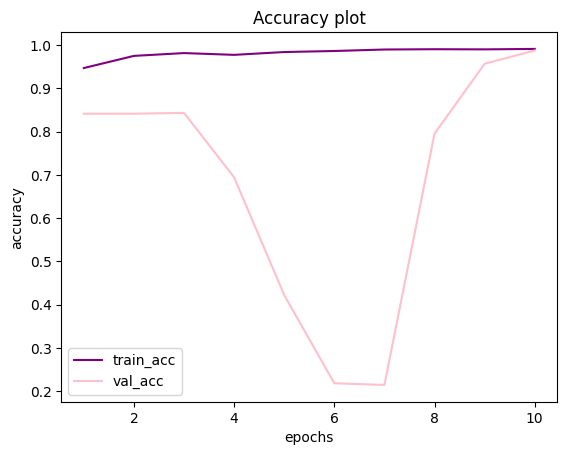

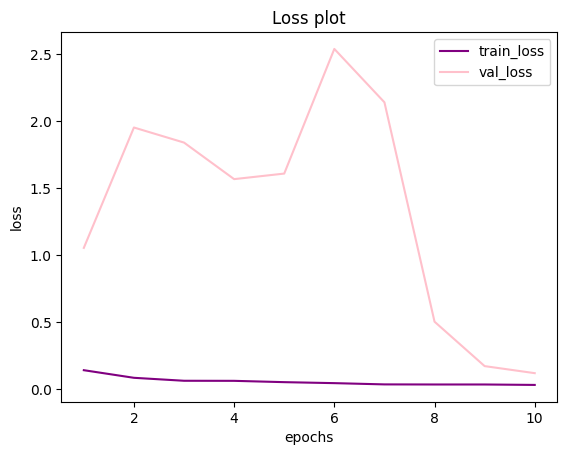

In [36]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [37]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction

53/53 [==============================] - 109s 2s/step


array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [38]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
pred1=[i[0] for i in prediction]
pred2=[i[1] for i in prediction]

0.9876072449952336
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       875
           1       0.96      0.97      0.96       174

    accuracy                           0.99      1049
   macro avg       0.98      0.98      0.98      1049
weighted avg       0.99      0.99      0.99      1049



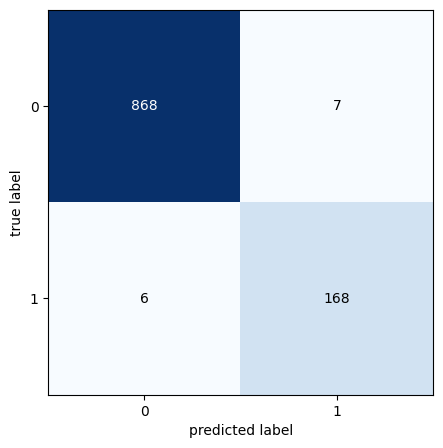

In [40]:
cm= confusion_matrix(val_data.classes, pred2)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, pred2))
print(classification_report(val_data.classes, pred2))

In [41]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, pred2)
# Assigning columns names
cm_df = pd.DataFrame(cm,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,868,7
Actual Positive,6,168


In [42]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

confusion_metrics(cm)

True Positives: 168
True Negatives: 868
False Positives: 7
False Negatives: 6
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 0.97
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.98


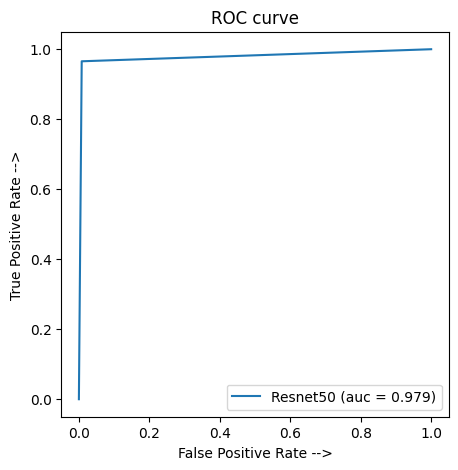

In [43]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(val_data.classes, pred2)
auc_resnet = auc(fpr, tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Resnet50 (auc = %0.3f)' % auc_resnet)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.title("ROC curve")
plt.show()

In [44]:
!pip install gradio

In [45]:
import gradio as gr

In [46]:
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(200,200,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1).flatten()
  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))

  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [47]:
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

<ipython-input-47-fca27765645e>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-47-fca27765645e>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(200,200))
<ipython-input-47-fca27765645e>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-47-fca27765645e>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

[0.9069883  0.09301165]
Normal 0.9069883227348328
Tuberculosis 0.09301165491342545
[1.9422575e-04 9.9980575e-01]
Normal 0.00019422575132921338
Tuberculosis 0.999805748462677
[0.9126686  0.08733138]
Normal 0.9126685857772827
Tuberculosis 0.0873313769698143
Keyboard interruption in main thread... closing server.


Following is our prediction:
0.99848986
0.99848986
Tuberculosis


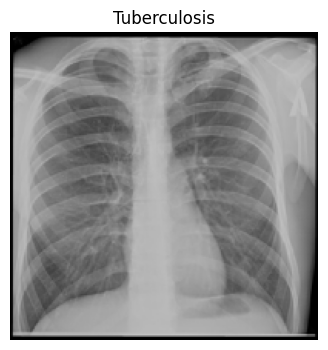

In [49]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-103.png"
new_img = tf.keras.utils.load_img(image_path, target_size=(200, 200))
img = tf.keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

d = prediction.flatten()
j = d.max()
# print(d)
# print(j)
for index,item in enumerate(d):
    if item == j:
        print(item)
        print(j)
        class_name = class_names[index]
        print(class_names[index])

#Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()
